In [97]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import random

For a UKB subject, we want to compute the Z-score for each voxel and then plot the z-score as a function of the mean input value per voxel 

In [98]:
input=np.load("/neurospin/dico/fred/Runs/01_betaVAE/Output/with all the outputs/2025-09-11/17-17-04/inputs.npy")
output=np.load("/neurospin/dico/fred/Runs/01_betaVAE/Output/with all the outputs/2025-09-11/17-17-04/outputs.npy")

In [99]:
output1=output[:,1,:,:,:]

In [100]:
input_flat = input.reshape(input.shape[0], -1)
output1_flat= output1.reshape(output1.shape[0], -1)

In [101]:
input_mean= np.mean(input_flat, axis= 0)

In [102]:
index_true_input= np.where(input_mean>0)[0]
true_input_mean= input_mean[index_true_input]

In [103]:
true_input=input_flat[:,index_true_input]
true_output= output1_flat[:,index_true_input]

In [104]:
def F_emp(X, x): #To compute the empirical CDF (Cumulative Distribution Function) of a distribution whith observations in the list X
    return np.mean(X <= x)

def Normal_score(L,x): #this function compute the normal-score of x using an initial distribution with observations L 

    F=F_emp(L,x)
    p = np.clip(F, 1e-6, 1 - 1e-6)
    z = norm.ppf(p)  #the Normal-score

    return z

In [105]:
i = random.randint(0,len(output1)-1) #to choose a subject randomly

In [106]:
i

28786

In [107]:
index0= np.where(true_input[i,:]==0)[0]
index1= np.where(true_input[i,:]==1)[0]

In [108]:
true_output.shape

(42433, 12122)

In [109]:
def split(L,x): #x is the voxel's index and L is an array with shape(a,b) from which we want to split the rows
    i0= np.where(L[:,x]==0)[0]
    i1= np.where(L[:,x]==1)[0]

    return i0, i1

In [110]:
z_score= [] #the list that will contain the z-score of each voxel for the previous subject 
z_score_total=[]
for j in range(len(true_output[1])):
    i0, i1= split(true_input,j)

    if true_input[i,j]==0:
        z=Normal_score(true_output[i0,j], true_output[i,j])
        z_t= Normal_score(true_output[:,j], true_output[i,j])
    else: 
        z=-Normal_score(true_output[i1,j], true_output[i,j])
        z_t= - Normal_score(true_output[:,j], true_output[i,j])  

    z_score.append(z)
    z_score_total.append(z_t)
z_score=np.array(z_score)
z_score_total= np.array(z_score_total)

In [111]:
x=[true_input_mean[index0], true_input_mean[index1], true_input_mean]
y=[z_score[index0], z_score[index1], z_score]

datasets= [(true_input_mean[index0],z_score[index0]), (true_input_mean[index1],z_score[index1]), (true_input_mean,z_score_total)]

titles= ['Only the voxels with an input value equal to 0', 'Only the voxels with an input value equal to 1', 'All the voxels']

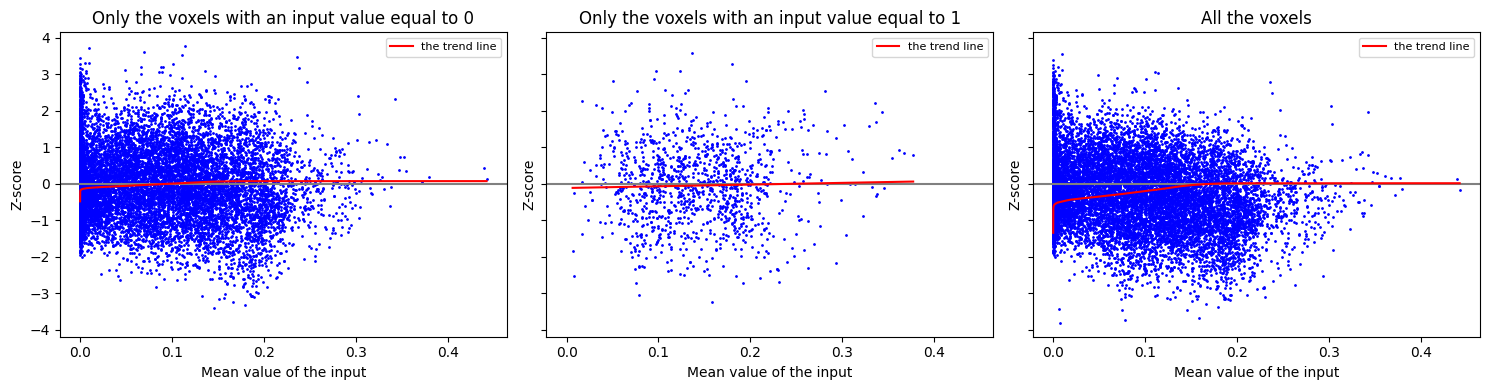

In [112]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharex=True, sharey=True)

for i, (ax, (x, y)) in enumerate(zip(axes, datasets)):

    ax.scatter(x, y, color= 'blue', s=1)

    # the line y=0
    ax.axhline(0, color='gray')

    # Droite de tendance (régression linéaire)
    coeffs = np.polyfit(x, y, deg=1)  # [pente, intercept]
    slope, intercept = coeffs
    y_fit = slope * x + intercept
    ax.plot(np.sort(x), np.sort(y_fit), color='red', label='the trend line')

    ax.set_title(titles[i])
    ax.set_xlabel("Mean value of the input")
    ax.set_ylabel("Z-score")
    ax.legend(fontsize=8)
    #ax.grid(True, linestyle=':', alpha=0.5)

plt.tight_layout()
plt.show()

For hcp and epilepsy_PBS subjects

In [113]:
input_hcp=np.load("/neurospin/dico/fred/Runs/01_betaVAE/Output/with all the outputs/2025-09-11/17-17-04/hcp/inputs.npy")
output_hcp=np.load("/neurospin/dico/fred/Runs/01_betaVAE/Output/with all the outputs/2025-09-11/17-17-04/hcp/outputs.npy")

input_epilepsy=np.load("/neurospin/dico/fred/Runs/01_betaVAE/Output/with all the outputs/2025-09-11/17-17-04/epilepsy_PBS/inputs.npy")
output_epilepsy=np.load("/neurospin/dico/fred/Runs/01_betaVAE/Output/with all the outputs/2025-09-11/17-17-04/epilepsy_PBS/outputs.npy")

In [114]:
output1_hcp=output_hcp[:,1,:,:,:]
output1_epilepsy=output_epilepsy[:,1,:,:,:]

In [115]:
input_flat_hcp = input_hcp.reshape(input_hcp.shape[0], -1)
output1_flat_hcp= output1_hcp.reshape(output1_hcp.shape[0], -1)

input_flat_epilepsy = input_epilepsy.reshape(input_epilepsy.shape[0], -1)
output1_flat_epilepsy = output1_epilepsy.reshape(output1_epilepsy.shape[0], -1)

In [116]:
true_input_hcp=input_flat_hcp[:,index_true_input]
true_output_hcp= output1_flat_hcp[:,index_true_input]

true_input_epilepsy=input_flat_epilepsy[:,index_true_input]
true_output_epilepsy= output1_flat_epilepsy[:,index_true_input]

In [117]:
index_irm_neg = [19,21,26,28,31,34,35,38,40,41,43,44,45]
index_irm_pos=[20,22,23,24,25,27,29,30,32,33,36,37,39,42,46,47,48,49,50,51,52,53,54,55,56]

In [118]:
input_control= true_input_epilepsy[0:19,:]
output_control= true_output_epilepsy[0:19,:]

input_irm_neg= true_input_epilepsy[index_irm_neg,:]
output_irm_neg= true_output_epilepsy[index_irm_neg,:]

input_irm_pos= true_input_epilepsy[index_irm_pos,:]
output_irm_pos= true_output_epilepsy[index_irm_pos,:]

In [119]:
def plot_z_score(Population): #Population is a string ("UKB", "hcp", "control", "irm_neg" or "irm_pos")
                        #This function plot, for a subject choosen randomly in the dataset, the z-score of a voxel as a function of the mean input value for this voxel 
    if Population== "UKB":
        input = true_input
        output= true_output
    if Population=="hcp":
        input= true_input_hcp
        output=true_output_hcp
    if Population=="control":
        input= input_control
        output= output_control
    if Population=="irm_neg":
        input= input_irm_neg
        output=output_irm_neg
    if Population=="irm_pos":
        input=input_irm_pos
        output= output_irm_pos
    
    i = random.randint(0,len(output)-1) #to choose a subject randomly

    index0= np.where(input[i,:]==0)[0]
    index1= np.where(input[i,:]==1)[0]

    z_score= [] #the list that will contain the z-score of each voxel for the previous subject 
    z_score_total=[]
    for j in range(len(output[1])):
        i0, i1= split(true_input,j)

        if input[i,j]==0:
            z=Normal_score(true_output[i0,j], output[i,j])
            z_t= Normal_score(true_output[:,j], output[i,j])
        else: 
            z=-Normal_score(true_output[i1,j], output[i,j])
            z_t= - Normal_score(true_output[:,j], output[i,j])  

        z_score.append(z)
        z_score_total.append(z_t)
    z_score=np.array(z_score)
    z_score_total= np.array(z_score_total)

    #plot
    x=[true_input_mean[index0], true_input_mean[index1], true_input_mean]
    y=[z_score[index0], z_score[index1], z_score]

    datasets= [(true_input_mean[index0],z_score[index0]), (true_input_mean[index1],z_score[index1]), (true_input_mean,z_score_total)]

    titles= ['Only the voxels with an input value equal to 0', 'Only the voxels with an input value equal to 1', 'All the voxels']

    fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharex=True, sharey=True)

    for i, (ax, (x, y)) in enumerate(zip(axes, datasets)):

        ax.scatter(x, y, color= 'blue', s=1)

        # the line y=0
        ax.axhline(0, color='gray')

        # Droite de tendance (régression linéaire)
        coeffs = np.polyfit(x, y, deg=1)  # [pente, intercept]
        slope, intercept = coeffs
        y_fit = slope * x + intercept
        ax.plot(np.sort(x), np.sort(y_fit), color='red', label='the trend line')

        ax.set_title(titles[i])
        ax.set_xlabel("Mean value of the input")
        ax.set_ylabel("Z-score")
        ax.legend(fontsize=8)
        #ax.grid(True, linestyle=':', alpha=0.5)

    fig.suptitle(f'For a subject in {Population}')
    plt.tight_layout()
    plt.show()
    

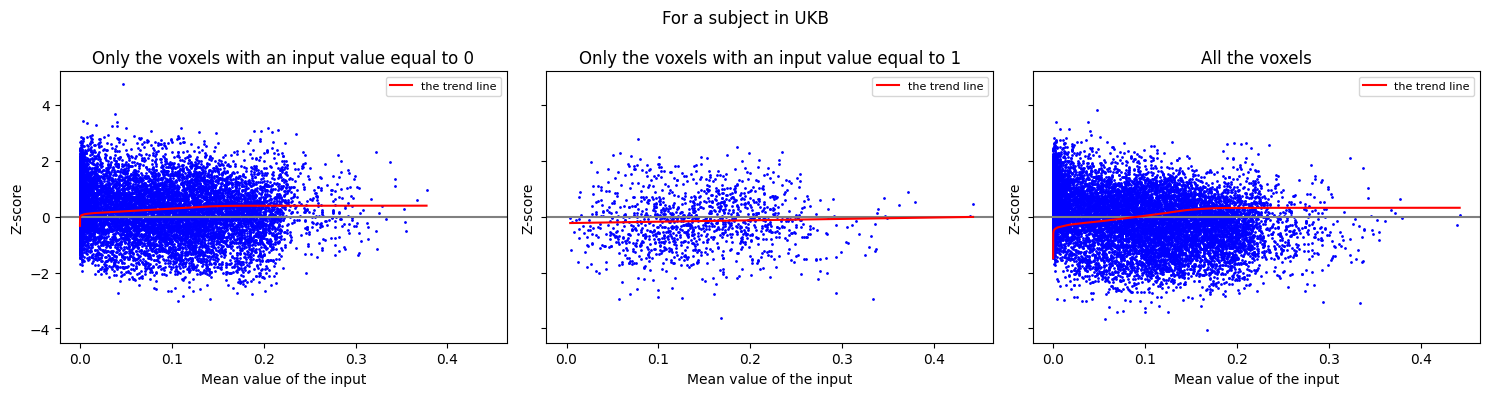

In [120]:
plot_z_score("UKB")

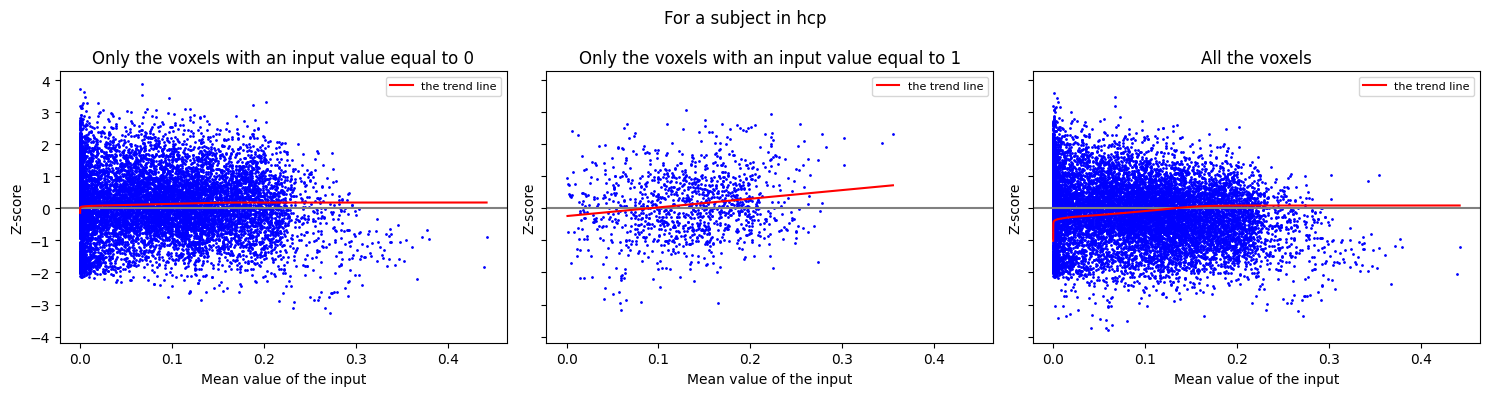

In [121]:
plot_z_score("hcp")

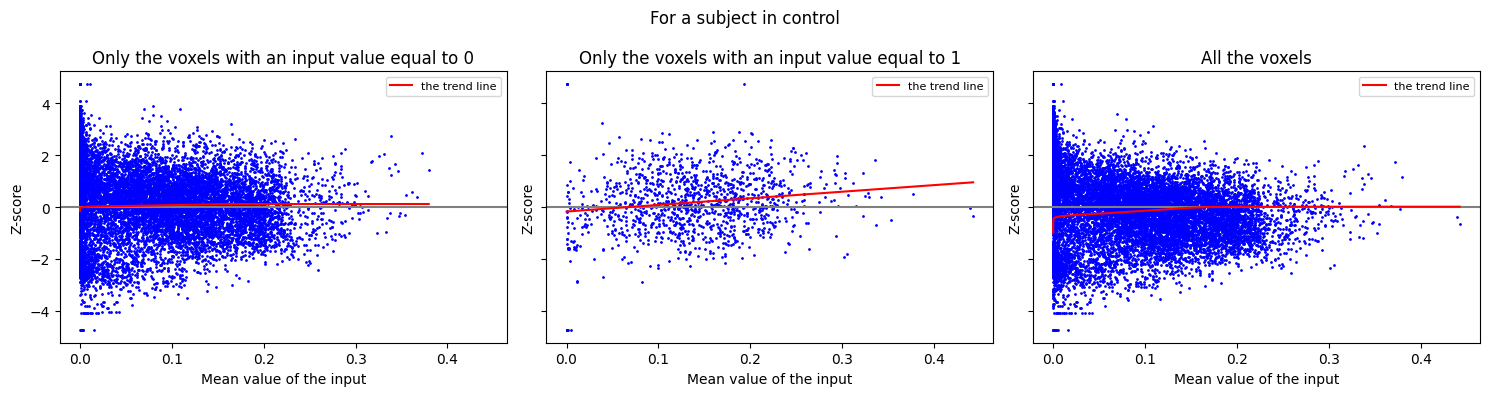

In [122]:
plot_z_score("control")

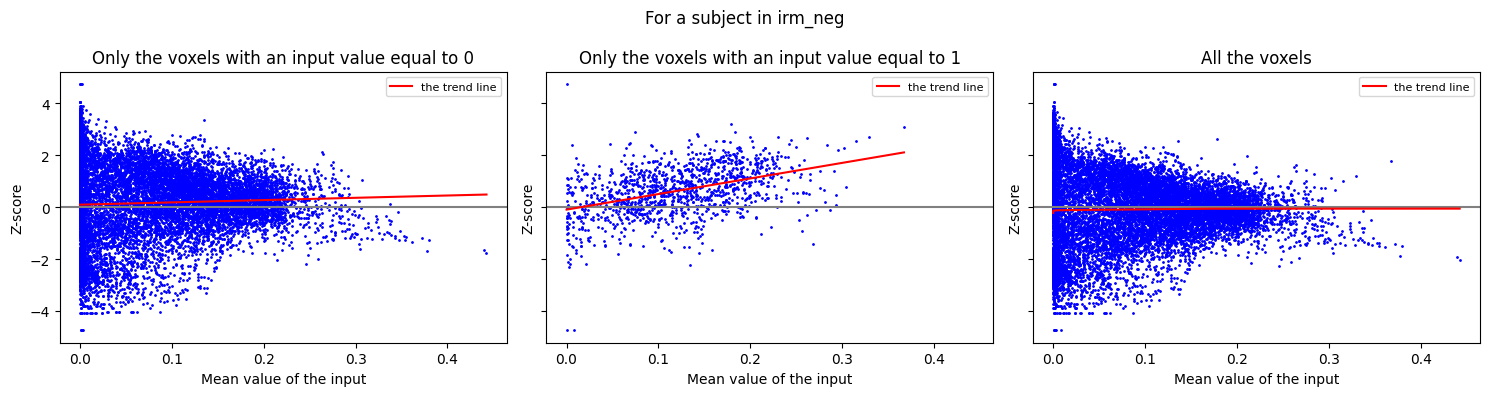

In [123]:
plot_z_score("irm_neg")

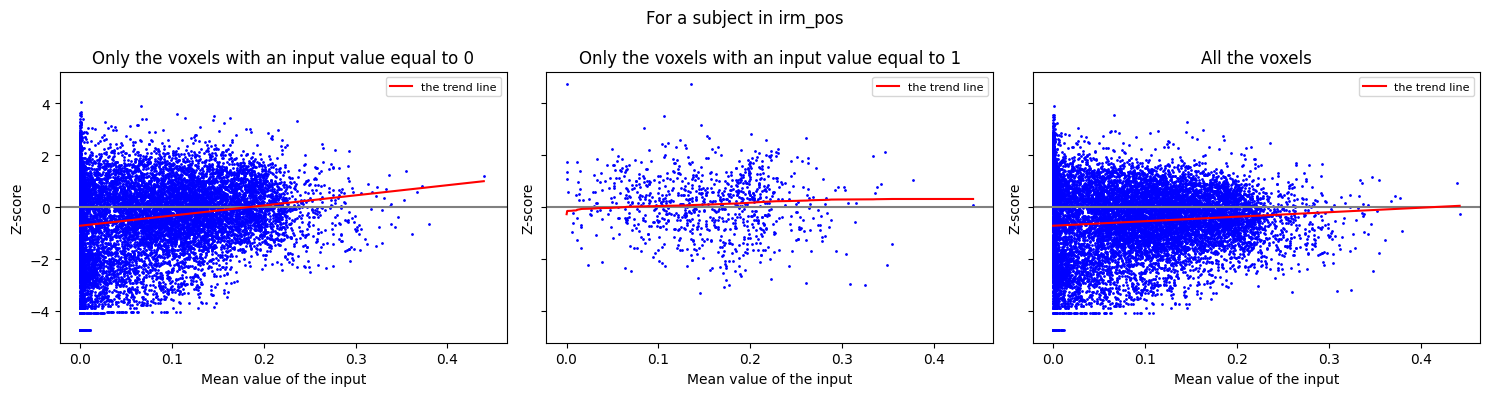

In [124]:
plot_z_score("irm_pos")

In [125]:
input_mean_hcp= np.mean(true_input_hcp, axis=0)
input_mean_ukb_1114= np.mean(true_input[:1114,:], axis=0)
input_mean_control= np.mean(input_control, axis=0)
input_mean_irm_neg= np.mean(input_irm_neg, axis=0)
input_mean_irm_pos= np.mean(input_irm_pos, axis=0)

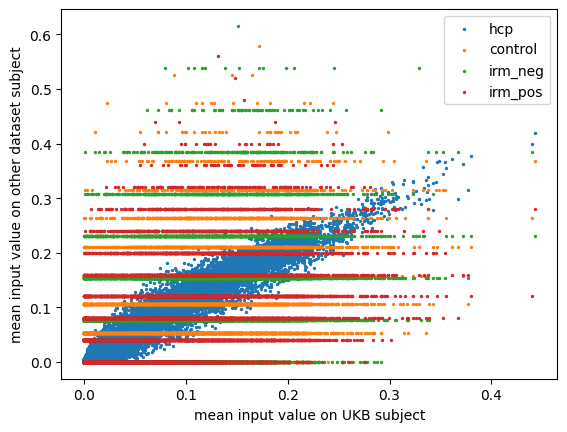

In [126]:
plt.scatter(true_input_mean, input_mean_hcp, label="hcp", s=2)
plt.scatter(true_input_mean, input_mean_control, label="control", s=2)
plt.scatter(true_input_mean, input_mean_irm_neg, label="irm_neg", s=2)
plt.scatter(true_input_mean, input_mean_irm_pos, label="irm_pos", s=2)

plt.xlabel("mean input value on UKB subject")
plt.ylabel("mean input value on other dataset subject")
plt.legend()
plt.show()



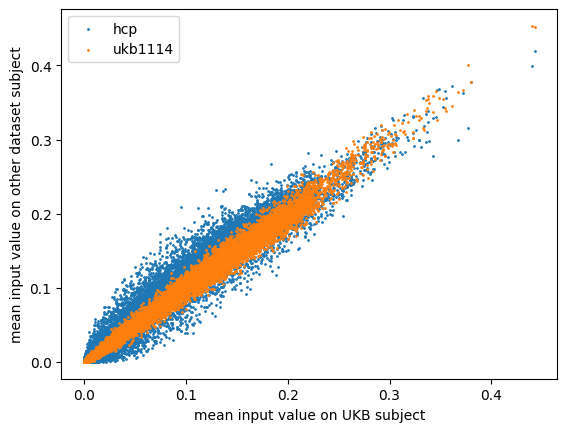

In [127]:
plt.scatter(true_input_mean, input_mean_hcp, label="hcp", s=1)
plt.scatter(true_input_mean, input_mean_ukb_1114, label="ukb1114", s=1)

plt.xlabel("mean input value on UKB subject")
plt.ylabel("mean input value on other dataset subject")
plt.legend()
plt.show()


/tmp/ipykernel_197981/1435895423.py:9: RuntimeWarning: Mean of empty slice.
  x1= true_input_mean[(true_input_mean>=i*step) & (true_input_mean<(i+1)*step) & (input_mean_hcp>=i*step) & (input_mean_hcp<(i+1)*step)].mean()
/neurospin/dico/fred/Runs/01_betaVAE/Program/2023_jlaval_STSbabies/betaVAE/.venv/lib/python3.12/site-packages/numpy/_core/_methods.py:144: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/tmp/ipykernel_197981/1435895423.py:10: RuntimeWarning: Mean of empty slice.
  y1= input_mean_hcp[(true_input_mean>=i*step) & (true_input_mean<(i+1)*step) & (input_mean_hcp>=i*step) & (input_mean_hcp<(i+1)*step)].mean()
/tmp/ipykernel_197981/1435895423.py:11: RuntimeWarning: Mean of empty slice.
  x2= true_input_mean[(true_input_mean>=i*step) & (true_input_mean<(i+1)*step) & (input_mean_ukb_1114>=i*step) & (input_mean_ukb_1114<(i+1)*step)].mean()
/tmp/ipykernel_197981/1435895423.py:12: RuntimeWarning: Mean of empty slice.
  y2= input_mean_ukb_111

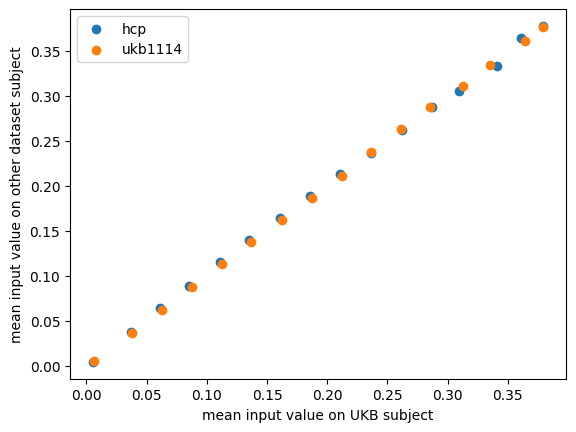

In [128]:
#we want to smooth this graph by partitionning the space into cells with dimensions step*step
step=0.025
x_mean1=[]
x_mean2=[]
y_mean1=[]
y_mean2=[]

for i in range(int(0.5/step)):
    x1= true_input_mean[(true_input_mean>=i*step) & (true_input_mean<(i+1)*step) & (input_mean_hcp>=i*step) & (input_mean_hcp<(i+1)*step)].mean()
    y1= input_mean_hcp[(true_input_mean>=i*step) & (true_input_mean<(i+1)*step) & (input_mean_hcp>=i*step) & (input_mean_hcp<(i+1)*step)].mean()
    x2= true_input_mean[(true_input_mean>=i*step) & (true_input_mean<(i+1)*step) & (input_mean_ukb_1114>=i*step) & (input_mean_ukb_1114<(i+1)*step)].mean()
    y2= input_mean_ukb_1114[(true_input_mean>=i*step) & (true_input_mean<(i+1)*step) & (input_mean_ukb_1114>=i*step) & (input_mean_ukb_1114<(i+1)*step)].mean()

    x_mean1.append(x1)
    x_mean2.append(x2)
    y_mean1.append(y1)
    y_mean2.append(y2)


plt.scatter(x_mean1, y_mean1, label="hcp")
plt.scatter(x_mean2, y_mean2, label="ukb1114")

plt.xlabel("mean input value on UKB subject")
plt.ylabel("mean input value on other dataset subject")
plt.legend()
plt.show()


In [129]:
def plot_z_score_bis(Population): #Population is a string ("UKB", "hcp", "control", "irm_neg" or "irm_pos")
                        #This function plot, for a subject choosen randomly in the dataset, the z-score of a voxel as a function of the mean input value for this voxel 
    if Population== "UKB":
        input = true_input
        output= true_output
    if Population=="hcp":
        input= true_input_hcp
        output=true_output_hcp
    if Population=="control":
        input= input_control
        output= output_control
    if Population=="irm_neg":
        input= input_irm_neg
        output=output_irm_neg
    if Population=="irm_pos":
        input=input_irm_pos
        output= output_irm_pos
    
    i = random.randint(0,len(output)-1) #to choose a subject randomly

    index0= np.where(input[i,:]==0)[0]
    index1= np.where(input[i,:]==1)[0]

    z_score= [] #the list that will contain the z-score of each voxel for the previous subject 
    z_score_total=[]
    for j in range(len(output[1])):
        i0, i1= split(true_input,j)

        if input[i,j]==0:
            z=Normal_score(true_output[i0,j], output[i,j])
            z_t=Normal_score(true_output[:,j], output[i,j])
        else: 
            z= - Normal_score(true_output[i1,j], output[i,j])
            z_t= - Normal_score(true_output[:,j], output[i,j])
        
        z_score.append(z)
        z_score_total.append(z_t)
    z_score=np.array(z_score)
    z_score_total= np.array(z_score_total)

    input_mean=np.mean(input, axis=0)

    #plot
    x=[input_mean[index0], input_mean[index1], input_mean]
    y=[z_score[index0], z_score[index1], z_score]

    datasets= [(input_mean[index0],z_score[index0]), (input_mean[index1],z_score[index1]), (input_mean,z_score_total)]

    titles= ['Only the voxels with an input value equal to 0', 'Only the voxels with an input value equal to 1', 'All the voxels']

    fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharex=True, sharey=True)

    for i, (ax, (x, y)) in enumerate(zip(axes, datasets)):

        ax.scatter(x, y, color= 'blue', s=1)

        # the line y=0
        ax.axhline(0, color='gray')

        # Droite de tendance (régression linéaire)
        coeffs = np.polyfit(x, y, deg=1)  # [pente, intercept]
        slope, intercept = coeffs
        y_fit = slope * x + intercept
        ax.plot(np.sort(x), np.sort(y_fit), color='red', label='the trend line')

        ax.set_title(titles[i])
        ax.set_xlabel("Mean value of the input")
        ax.set_ylabel("Z-score")
        ax.legend(fontsize=8)
        #ax.grid(True, linestyle=':', alpha=0.5)

    fig.suptitle(f'For a subject in {Population}')
    plt.tight_layout()
    plt.show()
    

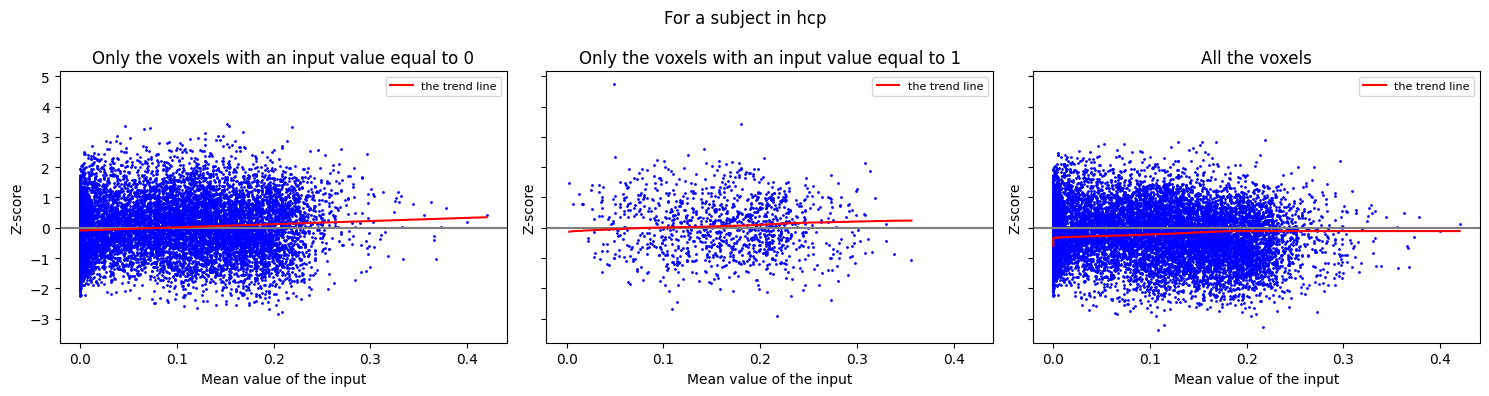

In [130]:
plot_z_score_bis("hcp")

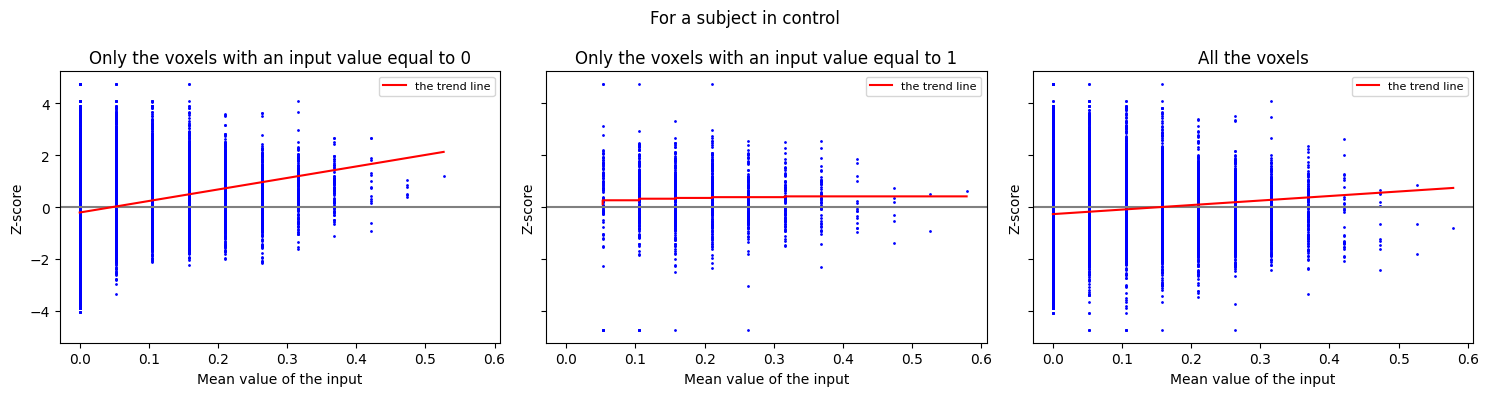

In [131]:
plot_z_score_bis("control")

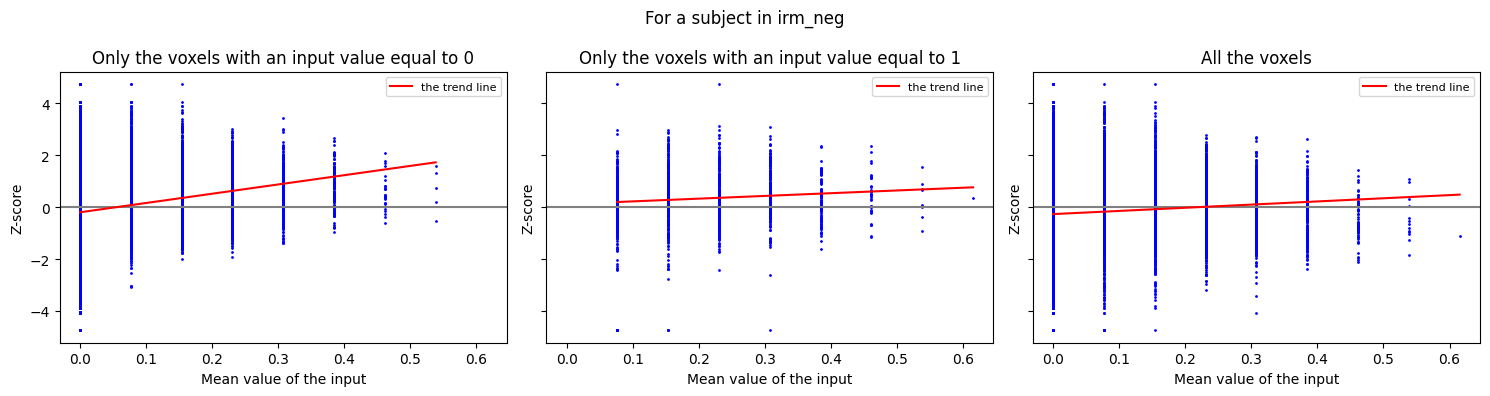

In [132]:
plot_z_score_bis("irm_neg")

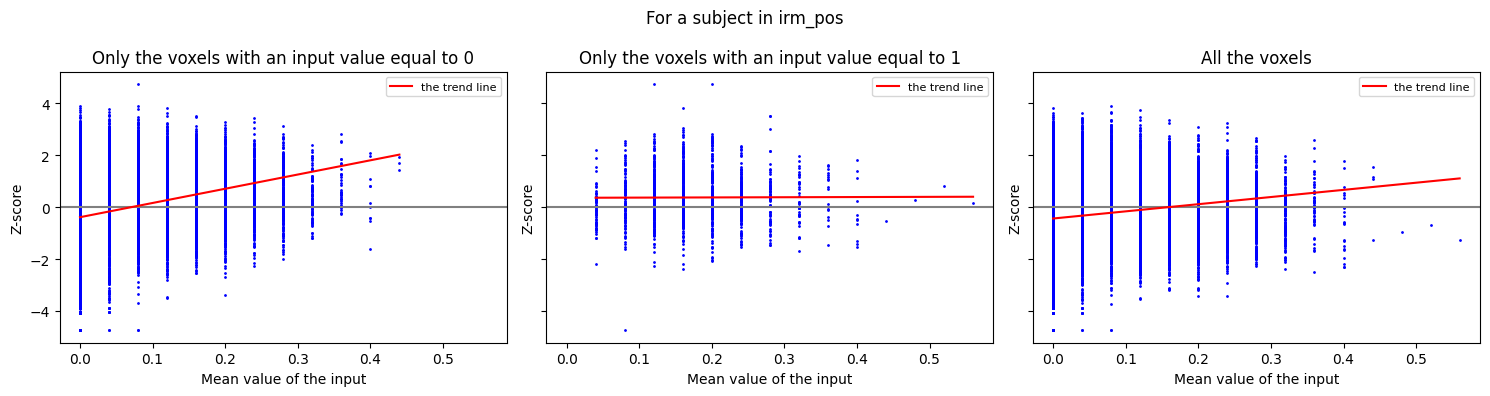

In [133]:
plot_z_score_bis("irm_pos")

In [134]:
def multi_z_score(input, output): #Given two array with shape (a,b), this function compute the z_score under the form of an array with shape (a,b) representing the z_score for each subject and for each voxel
                              #Z0 is the z-score of the voxels with 0 as input, Z1 the z_score of the voxels with 1 as input, and Z the z_score of all the voxels
    Z0=[]
    Z1=[]
    Z=[]

    for i in range (len(output)):
        z0=[]
        z1=[]
        z=[]
        for j in range(len(output[1])):

            i0, i1= split(true_input,j)
            if input[i,j]==0:
                z0.append(Normal_score(true_output[i0,j], output[i,j]))
                z.append(Normal_score(true_output[:,j], output[i,j]))

            else:
                z1.append(-Normal_score(true_output[i1,j], output[i,j]))
                z.append(-Normal_score(true_output[:,j], output[i,j]))
        Z0.append(z0)
        Z1.append(z1)
        Z.append(z)
    return Z0, Z1, Z



In [135]:
def plot_z_score_all_subjects(Population): #Population is a string ("UKB", "hcp", "control", "irm_neg" or "irm_pos")
                        
    if Population== "UKB":
        input = true_input
        output= true_output
        a, b = input.shape

        indices = np.random.choice(a, size=50, replace=False)
        input = input[indices, :]
        output=output[indices, :]
    if Population=="hcp":
        input= true_input_hcp
        output=true_output_hcp
        a, b = input.shape

        indices = np.random.choice(a, size=50, replace=False)
        input = input[indices, :]
        output=output[indices, :]
    if Population=="control":
        input= input_control
        output= output_control
    if Population=="irm_neg":
        input= input_irm_neg
        output=output_irm_neg
    if Population=="irm_pos":
        input=input_irm_pos
        output= output_irm_pos
    
    x_input0= []
    Z0=[]

    x_input1=[]
    Z1=[]

    x_input=[]
    Z=[]

    for i in range(len(input)):
            
            for j in range(len(output[1])):
                i0, i1= split(true_input,j)

                if input[i,j]==0:
                    Z0.append(Normal_score(true_output[i0,j], output[i,j]))
                    Z.append(Normal_score(true_output[:,j], output[i,j]))
                    x_input0.append(true_input_mean[j])
                    x_input.append(true_input_mean[j])
                else: 
                    Z1.append(- Normal_score(true_output[i1,j], output[i,j]))
                    Z.append(- Normal_score(true_output[:,j], output[i,j]))
                    x_input1.append(true_input_mean[j])
                    x_input.append(true_input_mean[j])

#plot
    x=[x_input0, x_input1, x_input]
    y=[Z0, Z1, Z]

    datasets= [(x_input0,Z0), (x_input1,Z1), (x_input,Z)]

    titles= ['Only the voxels with an input value equal to 0', 'Only the voxels with an input value equal to 1', 'All the voxels']

    fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharex=True, sharey=True)

    for i, (ax, (x, y)) in enumerate(zip(axes, datasets)):

        im= ax.hist2d(x, y, cmap='viridis')
        ax.set_title(titles[i])
        ax.set_xlabel("Mean value of the input among UKB subjects")
        ax.set_ylabel("Z-score")
        ax.legend(fontsize=8)
        #ax.grid(True, linestyle=':', alpha=0.5)
    fig.colorbar(im[3], ax=axes, label='Density', orientation='vertical')
    fig.suptitle(f'For all the subjects in {Population}')
    plt.tight_layout()
    plt.show()
    

 

/tmp/ipykernel_197981/3198154311.py:70: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize=8)
/tmp/ipykernel_197981/3198154311.py:74: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


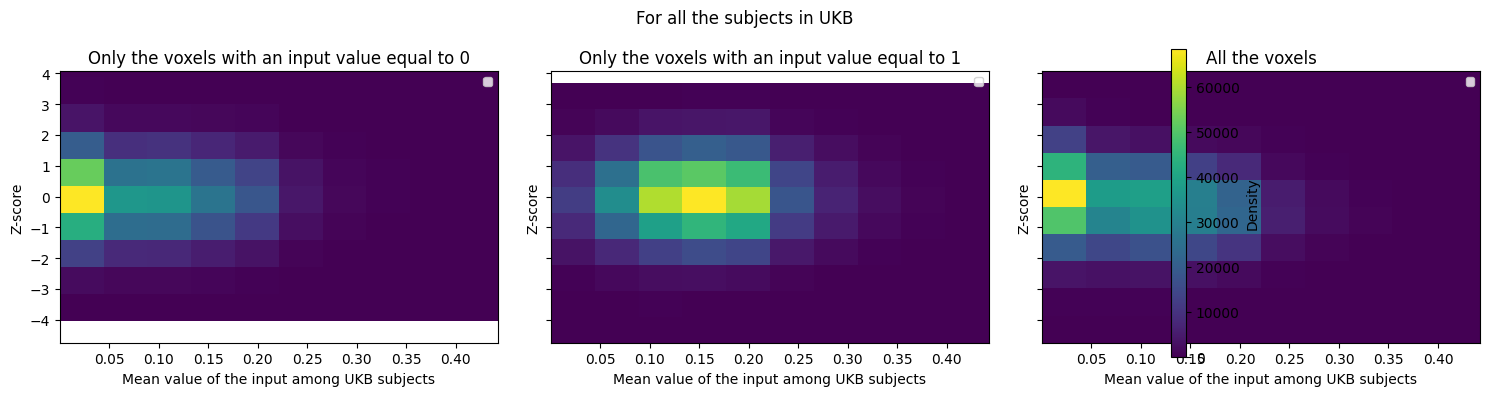

In [136]:
plot_z_score_all_subjects("UKB")

/tmp/ipykernel_197981/3198154311.py:70: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize=8)
/tmp/ipykernel_197981/3198154311.py:74: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


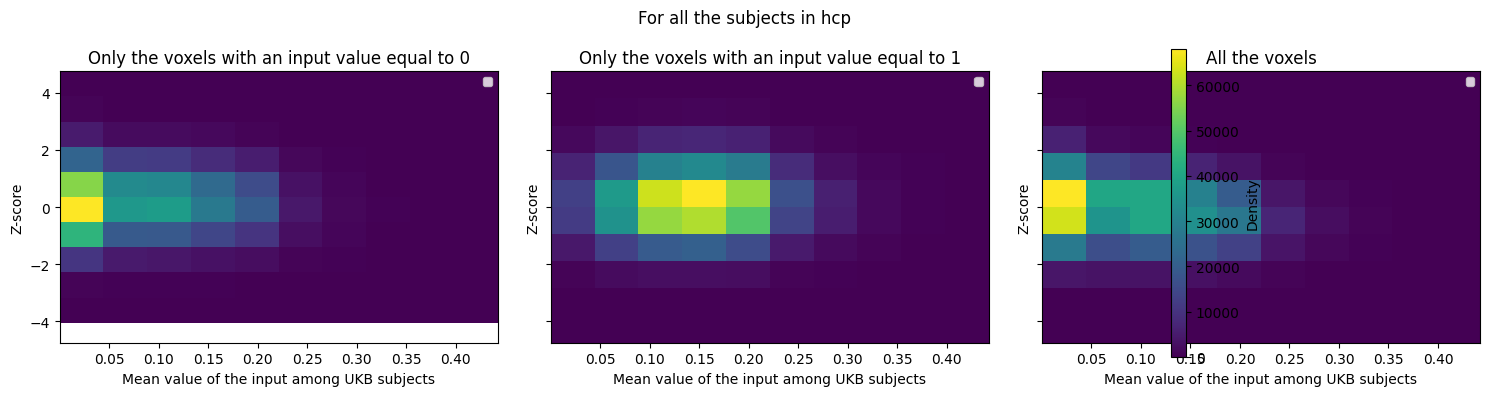

In [137]:
plot_z_score_all_subjects("hcp")

/tmp/ipykernel_197981/3198154311.py:70: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize=8)
/tmp/ipykernel_197981/3198154311.py:74: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


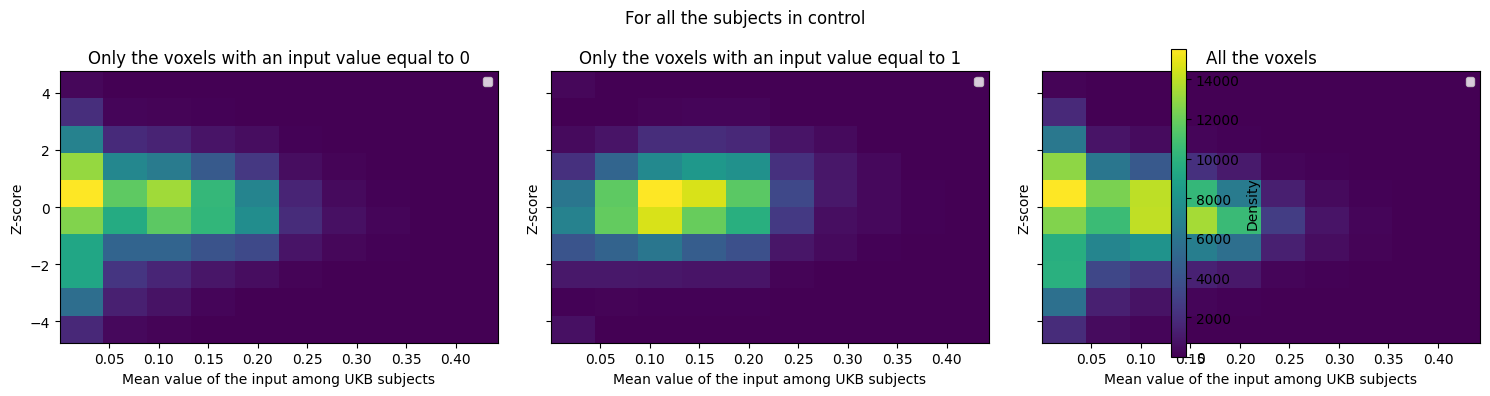

In [138]:
plot_z_score_all_subjects("control")

/tmp/ipykernel_197981/3198154311.py:70: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize=8)
/tmp/ipykernel_197981/3198154311.py:74: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


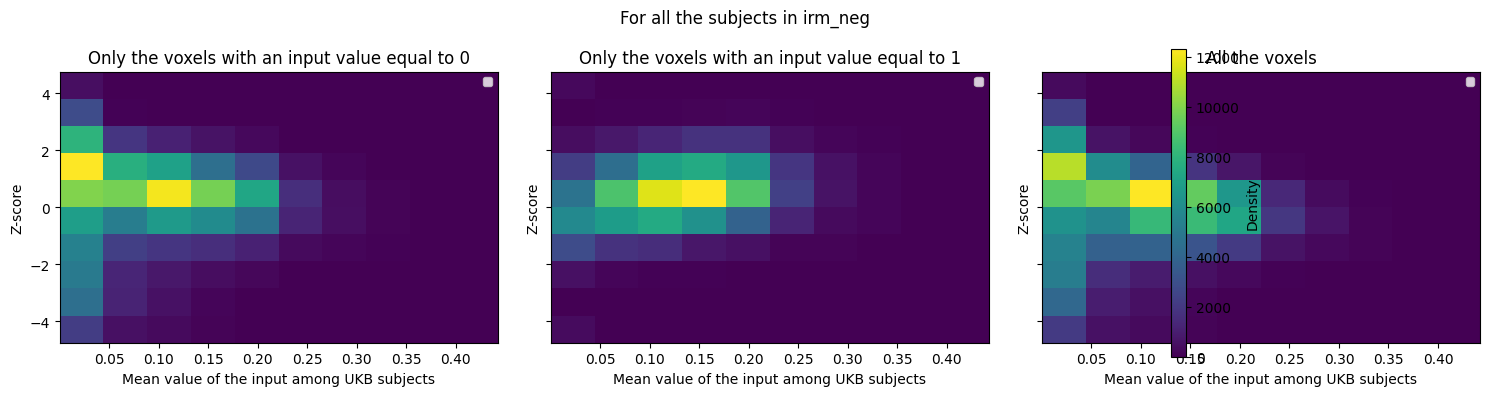

In [139]:
plot_z_score_all_subjects("irm_neg")

/tmp/ipykernel_197981/3198154311.py:70: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize=8)
/tmp/ipykernel_197981/3198154311.py:74: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


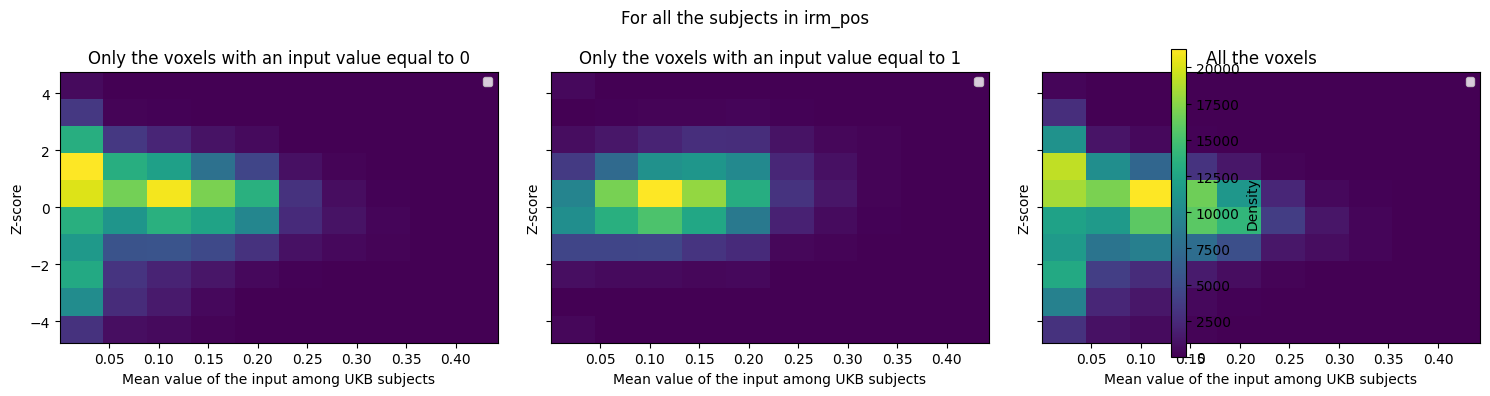

In [140]:
plot_z_score_all_subjects("irm_pos")

In [141]:
def plot_z_score_all_subjects_bis(Population): #Population is a string ("UKB", "hcp", "control", "irm_neg" or "irm_pos")
                        
    if Population== "UKB":
        input = true_input
        output= true_output
        a, b = input.shape

        indices = np.random.choice(a, size=50, replace=False)
        input = input[indices, :]
        output=output[indices, :]
    if Population=="hcp":
        input= true_input_hcp
        output=true_output_hcp
        a, b = input.shape

        indices = np.random.choice(a, size=50, replace=False)
        input = input[indices, :]
        output=output[indices, :]
    if Population=="control":
        input= input_control
        output= output_control
    if Population=="irm_neg":
        input= input_irm_neg
        output=output_irm_neg
    if Population=="irm_pos":
        input=input_irm_pos
        output= output_irm_pos
    
    x_input0= []
    Z0=[]

    x_input1=[]
    Z1=[]

    x_input=[]
    Z=[]

    input_mean=np.mean(input, axis=0)

    for i in range(len(input)):
            
            for j in range(len(output[1])):
                i0, i1= split(true_input,j)

                if input[i,j]==0:
                    Z0.append(Normal_score(true_output[i0,j], output[i,j]))
                    Z.append(Normal_score(true_output[:,j], output[i,j]))
                    x_input0.append(input_mean[j])
                    x_input.append(input_mean[j])
                else: 
                    Z1.append(- Normal_score(true_output[i1,j], output[i,j]))
                    Z.append(- Normal_score(true_output[:,j], output[i,j]))
                    x_input1.append(input_mean[j])
                    x_input.append(input_mean[j])

#plot
    x=[x_input0, x_input1, x_input]
    y=[Z0, Z1, Z]

    datasets= [(x_input0,Z0), (x_input1,Z1), (x_input,Z)]

    titles= ['Only the voxels with an input value equal to 0', 'Only the voxels with an input value equal to 1', 'All the voxels']

    fig, axes = plt.subplots(1, 3, figsize=(15, 4), sharex=True, sharey=True)

    for i, (ax, (x, y)) in enumerate(zip(axes, datasets)):

        im=ax.hist2d(x, y, cmap='viridis')

        ax.set_title(titles[i])
        ax.set_xlabel(f'Mean value of the input among {Population} subjects')
        ax.set_ylabel("Z-score")
        ax.legend(fontsize=8)
        #ax.grid(True, linestyle=':', alpha=0.5)
    fig.colorbar(im[3], ax=axes, label='Density', orientation='vertical')
    fig.suptitle(f'For all the subjects in {Population}')
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_197981/2089751811.py:73: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize=8)
/tmp/ipykernel_197981/2089751811.py:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


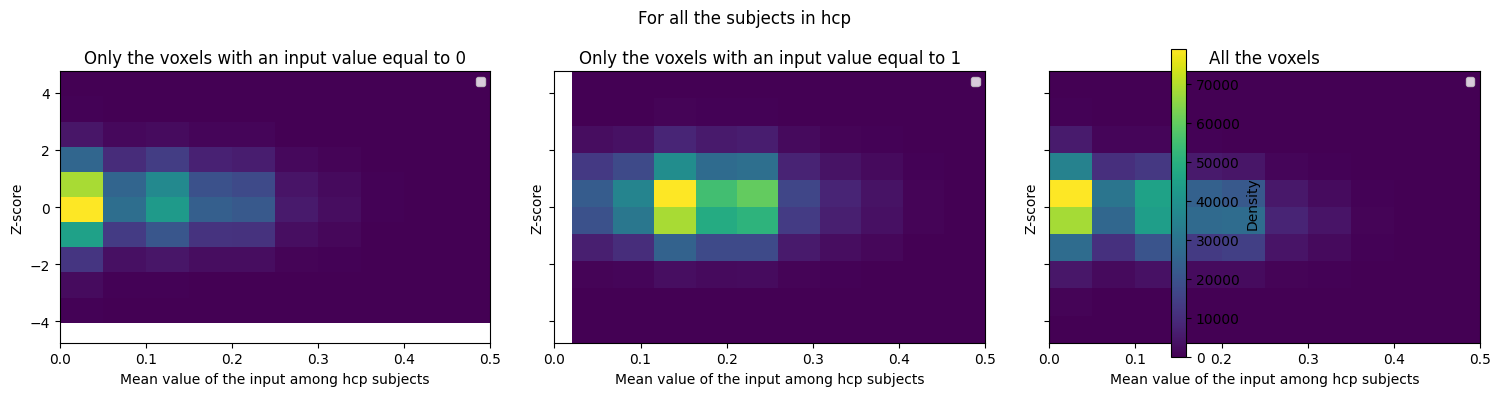

In [142]:
plot_z_score_all_subjects_bis("hcp")

/tmp/ipykernel_197981/2089751811.py:73: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize=8)
/tmp/ipykernel_197981/2089751811.py:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


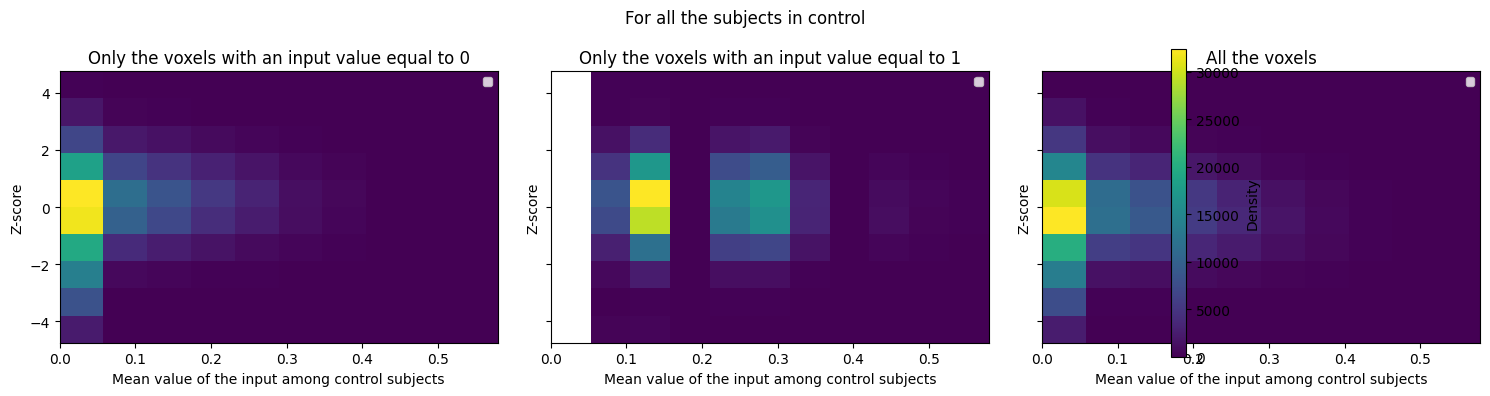

In [143]:
plot_z_score_all_subjects_bis("control")

/tmp/ipykernel_197981/2089751811.py:73: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize=8)
/tmp/ipykernel_197981/2089751811.py:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


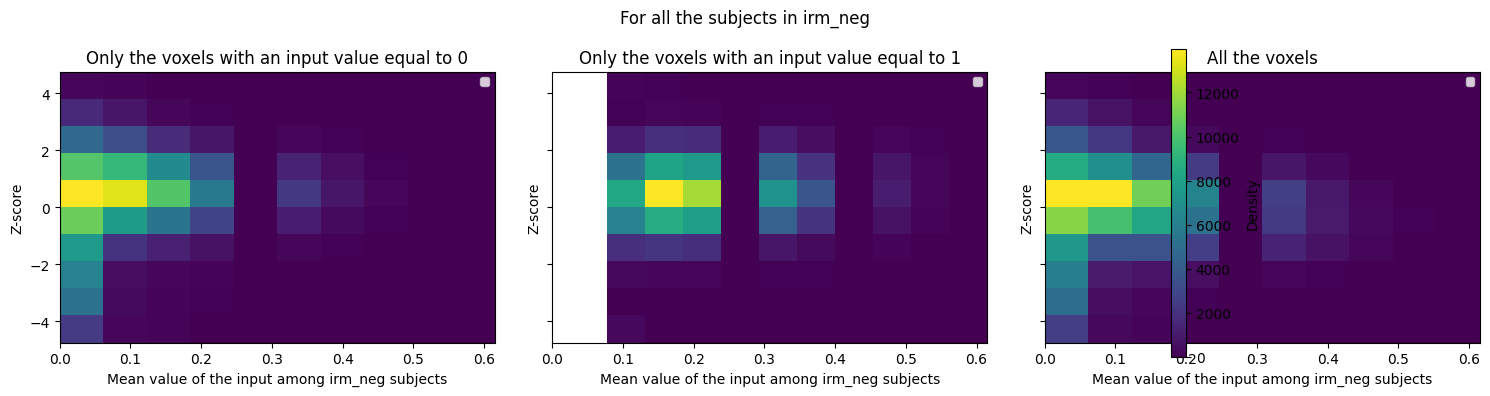

In [144]:
plot_z_score_all_subjects_bis("irm_neg")

/tmp/ipykernel_197981/2089751811.py:73: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize=8)
/tmp/ipykernel_197981/2089751811.py:77: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


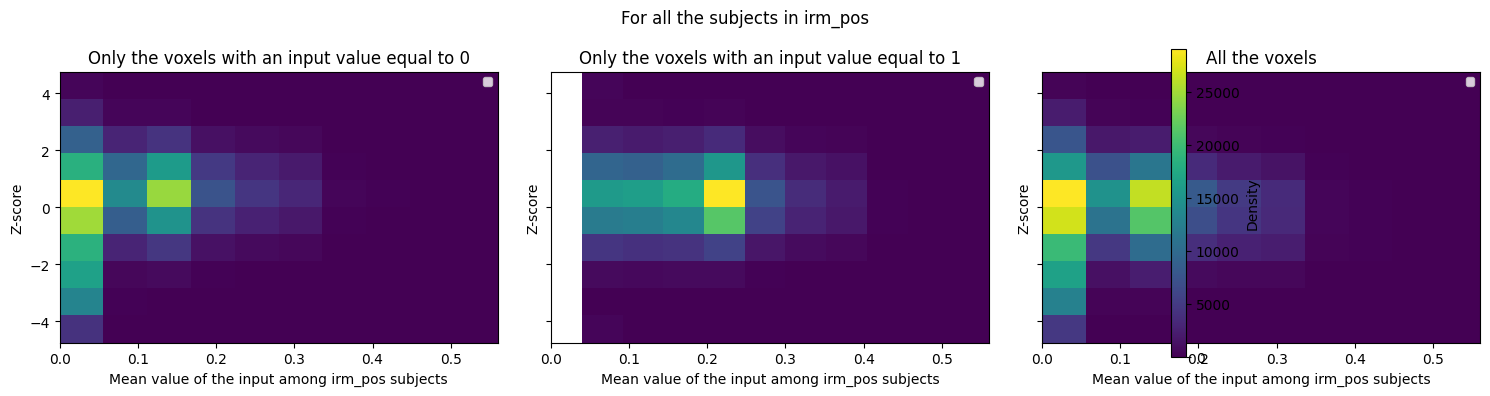

In [145]:
plot_z_score_all_subjects_bis("irm_pos")

In [146]:
def chi2(Population):

    if Population== "UKB":
        input = true_input
        output= true_output
        a, b = input.shape

        indices = np.random.choice(a, size=50, replace=False)
        input = input[indices, :]
        output=output[indices, :]
    if Population=="hcp":
        input= true_input_hcp
        output=true_output_hcp
        a, b = input.shape

        indices = np.random.choice(a, size=50, replace=False)
        input = input[indices, :]
        output=output[indices, :]
    if Population=="control":
        input= input_control
        output= output_control
    if Population=="irm_neg":
        input= input_irm_neg
        output=output_irm_neg
    if Population=="irm_pos":
        input=input_irm_pos
        output= output_irm_pos

    x0=[]
    x1=[]
    x=[]

    for i in range (len(output)):
        a0=[]
        a1=[]
        a=[]
        for j in range(len(output[1])):

            i0, i1= split(true_input,j)
            if input[i,j]==0:
                a.append(Normal_score(true_output[:,j], output[i,j]))
                z=Normal_score(true_output[i0,j], output[i,j])
                if z>=0:
                    a0.append(z**2)

            else:
                a.append(-Normal_score(true_output[:,j], output[i,j]))
                z=-Normal_score(true_output[i1,j], output[i,j])
                if z<=0:
                    a1.append(z**2)
        a= np.array(a)
        a0= np.array(a0)
        a1=np.array(a1)
        x.append(a.mean())
        x0.append(a0.mean())
        x1.append(a1.mean())
    return x0, x1, x

In [147]:
chi2_UKB0, chi2_UKB1, chi2_UKB= chi2("UKB")
chi2_hcp0, chi2_hcp1, chi2_hcp= chi2("hcp")
chi2_control0, chi2_control1, chi2_control= chi2("control")
chi2_irm_neg0, chi2_irm_neg1, chi2_irm_neg= chi2("irm_neg")
chi2_irm_pos0, chi2_irm_pos1, chi2_irm_pos= chi2("irm_pos")

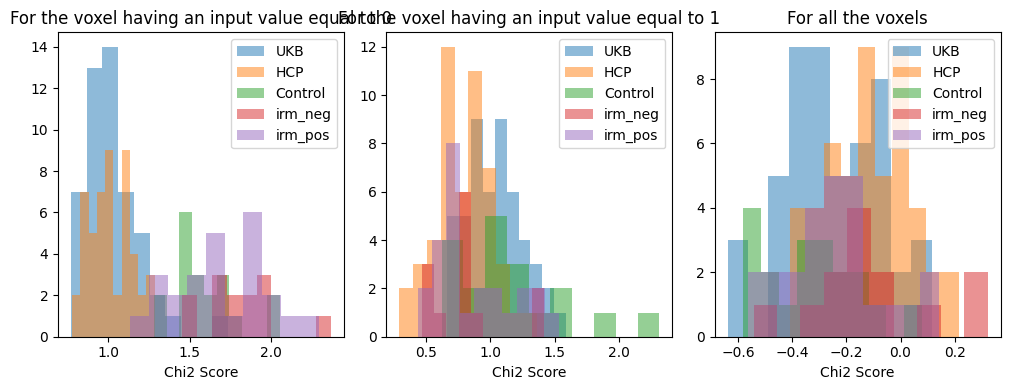

In [148]:
fig, axes = plt.subplots(1, 3, figsize=(10, 4), sharey=False)

density =False

axes[0].hist(chi2_UKB0, label='UKB', alpha=0.5, density=density)
axes[0].hist(chi2_hcp0, label='HCP', alpha=0.5, density=density)
axes[0].hist(chi2_control0, label='Control', alpha=0.5, density=density)
axes[0].hist(chi2_irm_neg0, label='irm_neg', alpha=0.5, density=density)
axes[0].hist(chi2_irm_pos0, label='irm_pos', alpha=0.5, density=density)
axes[0].set_title(f'For the voxel having an input value equal to 0' )
axes[0].legend()
axes[0].set_xlabel('Chi2 Score')
  
axes[1].hist(chi2_UKB1, label='UKB', alpha=0.5, density=density)
axes[1].hist(chi2_hcp1, label='HCP', alpha=0.5, density=density)
axes[1].hist(chi2_control1, label='Control', alpha=0.5, density=density)
axes[1].hist(chi2_irm_neg1, label='irm_neg', alpha=0.5, density=density)
axes[1].hist(chi2_irm_pos1, label='irm_pos', alpha=0.5, density=density)
axes[1].set_title(f'For the voxel having an input value equal to 1' )
axes[1].legend()
axes[1].set_xlabel('Chi2 Score')

axes[2].hist(chi2_UKB, label='UKB', alpha=0.5, density=density)
axes[2].hist(chi2_hcp, label='HCP', alpha=0.5, density=density)
axes[2].hist(chi2_control, label='Control', alpha=0.5, density=density)
axes[2].hist(chi2_irm_neg, label='irm_neg', alpha=0.5, density=density)
axes[2].hist(chi2_irm_pos, label='irm_pos', alpha=0.5, density=density)
axes[2].set_title(f'For all the voxels' )
axes[2].legend()
axes[2].set_xlabel('Chi2 Score')

plt.tight_layout()
plt.show()